In [21]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [22]:
map_image = cv2.imread(r"ref_image\map\roi\book_fair_2019_roi.png")
cam_image = cv2.imread(r"ref_image\cam\roi\front_room_roi.png")

In [23]:
with open("H_cam2map.json", "r") as f:
    transform = json.load(f)

H = np.array(transform["match_front_room"])
H

array([[ 0.95499152,  1.44536406,  0.05376705],
       [-0.02739988,  1.65504677,  0.10712096],
       [-0.07299328,  2.60997656,  1.        ]])

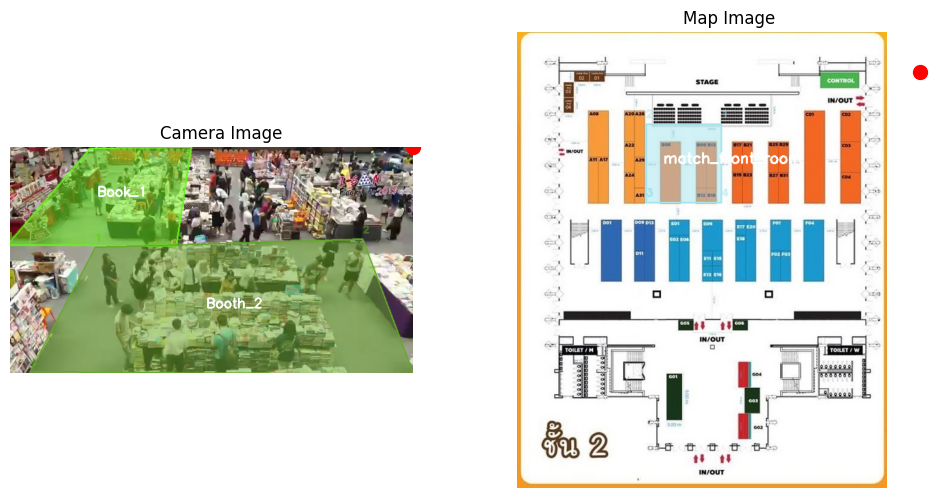

In [24]:
example_point = np.array([1,0, 1])
output_point = H @ example_point
tranformed_point = output_point[:2] / output_point[2]
tranformed_point

# plot map and cam
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))
plt.scatter(example_point[0] * cam_image.shape[1], example_point[1] * cam_image.shape[0], color='red', s=100, label='Example Point')
plt.title("Camera Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(map_image, cv2.COLOR_BGR2RGB))
plt.scatter(tranformed_point[0] * map_image.shape[1], tranformed_point[1] * map_image.shape[0], color='red', s=100, label='Transformed Point')
plt.title("Map Image")
plt.axis("off")


plt.show()
